In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
%matplotlib inline


In [ ]:
df=pd.DataFrame() # creating a panda dataframe
df=  pd.read_csv("/content/SCM-2020.csv",index_col='Date',parse_dates=True)
df.index.freq='MS' #frequency of data is monthly

In [ ]:
train = df.iloc[:-36, :]
test = df.iloc[-36:, :]

In [ ]:
pred = test.copy()
pred

,sales
Date,
2018-01-01,821
2018-02-01,773
2018-03-01,883
2018-04-01,898
2018-05-01,957
2018-06-01,924
2018-07-01,881
2018-08-01,837
2018-09-01,784


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)


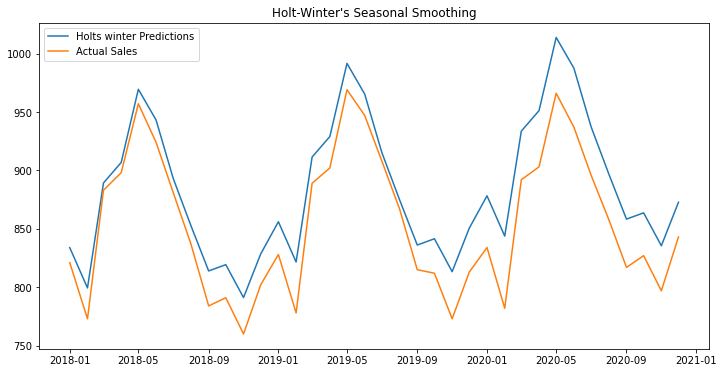

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12)
model2 = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=12, damped=True)
fit = model.fit()
pred = fit.forecast(36)
fit2 = model2.fit()
pred2 = fit2.forecast(36)

sse1 = np.sqrt(np.mean(np.square(test.values - pred.values)))
sse2 = np.sqrt(np.mean(np.square(test.values - pred2.values)))

fig, ax = plt.subplots(figsize=(12, 6))
# ax.plot(train.index[24:], train.values[24:]);
# ax.plot(test.index, test.values, label='Actual Sales');
ax.plot(pred,label='Holts winter Predictions')
ax.plot(test,label='Actual Sales')
# ax.plot(test.index, pred, linestyle='--', color='#ff7823', label="w/o damping (RMSE={:0.2f}, AIC={:0.2f})".format(sse1, fit.aic));
# ax.plot(test.index, pred2, linestyle='--', color='#3c763d', label="damped (RMSE={:0.2f}, AIC={:0.2f})".format(sse2, fit2.aic)); 
ax.legend();
ax.set_title("Holt-Winter's Seasonal Smoothing");

In [ ]:
RMSE_HWES=sqrt(mean_squared_error(pred,test))
MAE_HWES = mean_absolute_error(pred,test)
MAPE_HWES=np.mean(np.abs((test - pred) / test)) * 100
print('Mean Squared Error for Holts winter model is:',RMSE_HWES)
print('Mean Absolute Deviation for Holts winter model is:',MAE_HWES)
# print('MAPE for Holts Winter Model is:',MAPE_HWES)

Mean Squared Error for Holts winter model is: 32.38790308990607
Mean Absolute Deviation for Holts winter model is: 29.310688936924407


In [ ]:
print(fit.summary())

                       ExponentialSmoothing Model Results                       
Dep. Variable:                    endog   No. Observations:                  132
Model:             ExponentialSmoothing   SSE                           5982.392
Optimized:                         True   AIC                            535.418
Trend:                         Additive   BIC                            581.543
Seasonal:                      Additive   AICC                           541.471
Seasonal Periods:                    12   Date:                 Tue, 30 Nov 2021
Box-Cox:                          False   Time:                         16:07:37
Box-Cox Coeff.:                    None                                         
                          coeff                 code              optimized      
---------------------------------------------------------------------------------
smoothing_level               0.6827313                alpha                 True
smoothing_slope          

In [ ]:
  y_test, y_pred = np.array(test), np.array(pred)

In [ ]:
MAPE_HWES=np.mean(np.abs((y_test - y_pred) / y_test)) * 100

In [ ]:
print('MAPE for Holts Winter Model is:',MAPE_HWES)

MAPE for Holts Winter Model is: 8.551391910240195


In [ ]:
y_pred

array([ 833.872298  ,  799.40673682,  889.22313965,  906.76283623,
        969.39200553,  943.11757511,  893.11313653,  852.66127391,
        813.93780954,  819.3135994 ,  791.14393018,  828.41432357,
        856.04198712,  821.57642594,  911.39282877,  928.93252535,
        991.56169465,  965.28726424,  915.28282565,  874.83096303,
        836.10749866,  841.48328853,  813.3136193 ,  850.58401269,
        878.21167624,  843.74611506,  933.56251789,  951.10221447,
       1013.73138378,  987.45695336,  937.45251477,  897.00065215,
        858.27718778,  863.65297765,  835.48330842,  872.75370181])